### Flatiron School DS January 2019 Hackathon
* Emily J. Cain & Andrew Wester

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.preprocessing import LabelEncoder
# from IPython.display import Image
# from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# from sklearn.externals.six import StringIO
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, recall_score
from sklearn.metrics import make_scorer, recall_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
# for col in df.columns:
    # print(df[col].value_counts().nlargest(10))

In [7]:
df.TotalCharges.value_counts().nlargest(5)

20.2     11
         11
19.75     9
19.65     8
19.9      8
Name: TotalCharges, dtype: int64

In [8]:
# found by Andrew in CSV file
hidden_vals = ['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO', '1371-DWPAZ', '7644-OMVMY', 
               '3213-VVOLG', '2520-SGTTA', '2923-ARZLG', '4075-WKNIU', '2775-SEFEE']

In [9]:
for val in hidden_vals:
    print(df.loc[df['customerID'] == val].index)

Int64Index([488], dtype='int64')
Int64Index([753], dtype='int64')
Int64Index([936], dtype='int64')
Int64Index([1082], dtype='int64')
Int64Index([1340], dtype='int64')
Int64Index([3331], dtype='int64')
Int64Index([3826], dtype='int64')
Int64Index([4380], dtype='int64')
Int64Index([5218], dtype='int64')
Int64Index([6670], dtype='int64')
Int64Index([6754], dtype='int64')


In [10]:
indices = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
for index in indices:
    df.drop(index=index, inplace=True)

In [11]:
df.TotalCharges.value_counts().nlargest(5)

20.2     11
19.75     9
19.65     8
20.05     8
19.9      8
Name: TotalCharges, dtype: int64

In [12]:
df.TotalCharges = df.TotalCharges.astype('float')

In [13]:
df.drop('customerID', inplace=True, axis=1)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# Convert yes/no columns

yes_no_columns = ['Partner',
                  'Dependents',
                  'PhoneService',
                  'OnlineSecurity',
                  'OnlineBackup',
                  'DeviceProtection',
                  'TechSupport',
                  'StreamingMovies',
                  'StreamingTV',
                  'PaperlessBilling',
                  'Churn'
                 ]

for col in yes_no_columns:
    df[col].replace(to_replace='Yes', value=1, inplace=True)
    df[col].replace(to_replace='No', value=0, inplace=True)

In [16]:
# Notes: don't need multiple phoneline columns, probably don't need streamingtv and streamingmovies - check correlation

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
df.gender.replace({'Female': 1, 'Male': 0}, inplace=True)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
df.drop('MultipleLines', axis=1, inplace=True)

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [22]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.011902,0.013779,-0.000048,0.008545
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
PaperlessBilling,0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
MonthlyCharges,0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
TotalCharges,-0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


In [23]:
no_internet_columns = ['StreamingTV',
                      'StreamingMovies',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      ]

for col in no_internet_columns:
    df[col].replace({'No internet service': 0}, inplace=True)

In [24]:
for col in no_internet_columns:
    print(df[col].value_counts())

0    4329
1    2703
Name: StreamingTV, dtype: int64
0    4301
1    2731
Name: StreamingMovies, dtype: int64
0    5017
1    2015
Name: OnlineSecurity, dtype: int64
0    4607
1    2425
Name: OnlineBackup, dtype: int64
0    4614
1    2418
Name: DeviceProtection, dtype: int64
0    4992
1    2040
Name: TechSupport, dtype: int64


In [25]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.016328,0.013093,0.000807,0.008507,0.007124,0.010105,0.011902,0.013779,-0.000048,0.008545
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.156258,0.219874,0.102411,0.150541
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,-0.013957,0.097825,0.319072,-0.149982
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.110131,-0.112343,0.064653,-0.163128
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.004823,0.246862,0.825880,-0.354049
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.016696,0.248033,0.113008,0.011691
OnlineSecurity,0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,-0.004051,0.296447,0.412619,-0.171270
OnlineBackup,0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.127056,0.441529,0.510100,-0.082307
DeviceProtection,0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.104079,0.482607,0.522881,-0.066193
TechSupport,0.008507,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,0.280155,0.037536,0.338301,0.432868,-0.164716


In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [28]:
df.InternetService.replace({'Fiber optic': 1, 'DSL': 1, 'No': 0}, inplace=True)

In [29]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [30]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [31]:
df.PaymentMethod.replace({'Bank transfer (automatic)': 'Automatic', 'Credit card (automatic)': 'Automatic'}, inplace=True)

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,1,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,1,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,1,1,0,1,1,0,0,One year,0,Automatic,42.30,1840.75,0
4,1,0,0,0,2,1,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [33]:
df.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

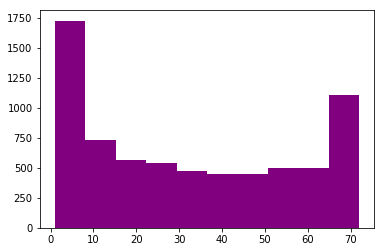

In [34]:
plt.hist(df.tenure, color='purple');

In [35]:
dummy_df = pd.get_dummies(df)
dummy_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,0,1,0,...,1,29.85,29.85,0,1,0,0,0,1,0
1,0,0,0,0,34,1,1,1,0,1,...,0,56.95,1889.50,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,1,1,0,...,1,53.85,108.15,1,1,0,0,0,0,1
3,0,0,0,0,45,0,1,1,0,1,...,0,42.30,1840.75,0,0,1,0,1,0,0
4,1,0,0,0,2,1,1,0,0,0,...,1,70.70,151.65,1,1,0,0,0,1,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null object
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 1.1+ MB


In [39]:
y = dummy_df.Churn
X = dummy_df.drop('Churn', axis=1)

In [40]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [43]:
scaled_df = pd.DataFrame(scaled_X, index=X.index, columns=X.columns)

In [44]:
scaled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.52513,-0.633746,1.378330,-0.723918,...,-0.796849,0.828939,-1.161694,-0.994194,0.902613,-0.514537,-0.561364,-0.878482,1.404764,-0.543604
1,-0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,0.52513,1.577918,-0.725516,1.381372,...,-0.796849,-1.206361,-0.260878,-0.173740,-1.107895,1.943495,-0.561364,-0.878482,-0.711863,1.839576
2,-0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,0.52513,1.577918,1.378330,-0.723918,...,-0.796849,0.828939,-0.363923,-0.959649,0.902613,-0.514537,-0.561364,-0.878482,-0.711863,1.839576
3,-0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.52513,1.577918,-0.725516,1.381372,...,-0.796849,-1.206361,-0.747850,-0.195248,-1.107895,1.943495,-0.561364,1.138327,-0.711863,-0.543604
4,1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,0.52513,-0.633746,-0.725516,-0.723918,...,-0.796849,0.828939,0.196178,-0.940457,0.902613,-0.514537,-0.561364,-0.878482,1.404764,-0.543604


In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, random_state=19)

#### Decision Tree

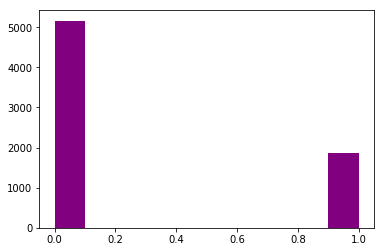

In [47]:
plt.hist(y, color='purple');

In [48]:
dt = DecisionTreeClassifier(random_state=19, class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=19,
            splitter='best')

In [49]:
dt_train_preds = dt.predict(X_train)
dt_test_preds = dt.predict(X_test)

In [50]:
def print_metrics(y_train, y_test, y_train_preds, y_test_preds):
    print('Train Set Classification Report')
    print(classification_report(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Classification Report')
    print(classification_report(y_test, y_test_preds))
    print('*'*50)
    print('Train Set Confusion Matrix')
    print(confusion_matrix(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Confusion Matrix')
    print(confusion_matrix(y_test, y_test_preds))
    print('*'*50)
    print('Train Set Accuracy Score')
    print(accuracy_score(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Accuracy Score')
    print(accuracy_score(y_test, y_test_preds))

In [51]:
print_metrics(y_train, y_test, dt_train_preds, dt_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3878
           1       0.99      1.00      1.00      1396

   micro avg       1.00      1.00      1.00      5274
   macro avg       1.00      1.00      1.00      5274
weighted avg       1.00      1.00      1.00      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1285
           1       0.51      0.53      0.52       473

   micro avg       0.74      0.74      0.74      1758
   macro avg       0.67      0.67      0.67      1758
weighted avg       0.74      0.74      0.74      1758

**************************************************
Train Set Confusion Matrix
[[3870    8]
 [   0 1396]]
**************************************************
Test Set Confusion Matrix
[[1046  239]
 [ 224  249]]
***********************

#### Random Forest

In [58]:
rf = RandomForestClassifier(random_state=19, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=19,
            verbose=0, warm_start=False)

In [59]:
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

In [60]:
print_metrics(y_train, y_test, rf_train_preds, rf_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3878
           1       0.99      0.93      0.96      1396

   micro avg       0.98      0.98      0.98      5274
   macro avg       0.98      0.97      0.97      5274
weighted avg       0.98      0.98      0.98      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1285
           1       0.62      0.44      0.51       473

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.72      0.67      0.68      1758
weighted avg       0.76      0.78      0.76      1758

**************************************************
Train Set Confusion Matrix
[[3866   12]
 [  93 1303]]
**************************************************
Test Set Confusion Matrix
[[1159  126]
 [ 266  207]]
***********************

In [62]:
def custom_predict(clf, X_test, thresh=0.35):
    y_preds = clf.predict_proba(X_test)
    classes = []
    for pred in y_preds:
        if pred[1] >= thresh:
            classes.append(1)
        else:
            classes.append(0)
    return np.array(classes)

In [63]:
rf_custom_y_preds = custom_predict(rf, X_test)

In [65]:
print_metrics(y_train, y_test, rf_train_preds, rf_custom_y_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3878
           1       0.99      0.93      0.96      1396

   micro avg       0.98      0.98      0.98      5274
   macro avg       0.98      0.97      0.97      5274
weighted avg       0.98      0.98      0.98      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1285
           1       0.53      0.65      0.59       473

   micro avg       0.75      0.75      0.75      1758
   macro avg       0.70      0.72      0.71      1758
weighted avg       0.77      0.75      0.76      1758

**************************************************
Train Set Confusion Matrix
[[3866   12]
 [  93 1303]]
**************************************************
Test Set Confusion Matrix
[[1016  269]
 [ 165  308]]
***********************

In [66]:
def plot_feature_importances(model):
    
    """Visualize feature importance of selected model as determined by feature_importances_ method."""
    
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='purple') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

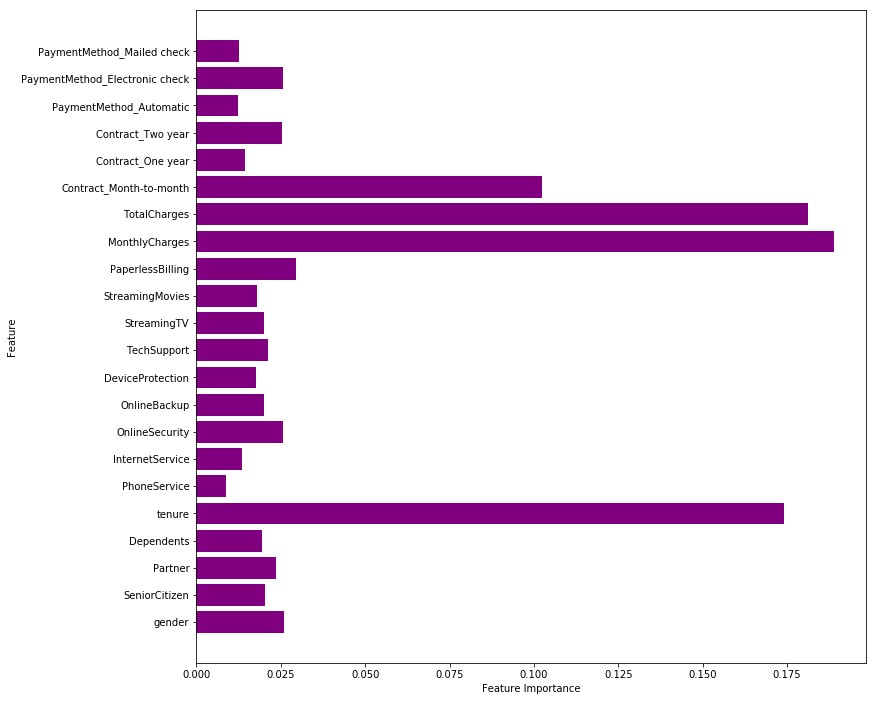

In [67]:
plot_feature_importances(rf)

#### Random Forest GridSearch

In [74]:
rf_param_grid = {
    'n_estimators': [5, 10, 15, 20, 35, 50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'min_impurity_decrease': [0, 0.1, 0.001, 0.0001, 0.00001]
}

num_perm = 6 * 2 * 4 * 5 * 5 * 3 * 5
print(f'GridSearch will search through {num_perm} different permutations.')

GridSearch will search through 18000 different permutations.


In [70]:
import time

In [75]:
# start_time = time.time()

# rf_grid_search = GridSearchCV(rf, rf_param_grid, scoring='recall', cv=3)
# rf_grid_search.fit(scaled_df, y)

# print(f'Best Score: {rf_grid_search.best_score_ * 100}%')
# print(f'Total Runtime: {time.time() - start_time} seconds')
# print('')
# print(f'Optimal Parameters: {rf_grid_search.best_params_}')

Best Score: 91.22525414660247%
Total Runtime: 2019.1292400360107 seconds

Optimal Parameters: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 0.3, 'min_samples_split': 0.1, 'n_estimators': 5}


#### Results of Random Forest GridSearch
* class_weight: balanced_subsample
* criterion: entropy
* max_depth: None (Default)
* min_impurity_decrease: 0.1
* min_samples_leaf: 0.3
* min_samples_split: 0.1
* n_estimators: 5

In [76]:
optimized_rf = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy', random_state=19, \
                                     min_impurity_decrease=0.1, min_samples_leaf=0.3, min_samples_split=0.1, \
                                     n_estimators=5)
optimized_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.1,
            min_impurity_split=None, min_samples_leaf=0.3,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=None, oob_score=False, random_state=19,
            verbose=0, warm_start=False)

In [77]:
op_rf_train_preds = optimized_rf.predict(X_train)
op_rf_test_preds = optimized_rf.predict(X_test)

In [78]:
print_metrics(y_train, y_test, op_rf_train_preds, op_rf_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      3878
           1       0.40      0.74      0.52      1396

   micro avg       0.64      0.64      0.64      5274
   macro avg       0.63      0.67      0.61      5274
weighted avg       0.74      0.64      0.66      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.87      0.61      0.71      1285
           1       0.41      0.75      0.53       473

   micro avg       0.64      0.64      0.64      1758
   macro avg       0.64      0.68      0.62      1758
weighted avg       0.74      0.64      0.66      1758

**************************************************
Train Set Confusion Matrix
[[2338 1540]
 [ 368 1028]]
**************************************************
Test Set Confusion Matrix
[[778 507]
 [119 354]]
***************************

#### Decision Tree GridSearch

In [82]:
dt = DecisionTreeClassifier(random_state=19)

In [83]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [0.1, 0.3, 0.5],
    'min_samples_leaf': [0.1, 0.3, 0.5],
    'class_weight': [None, 'balanced'],
    'min_impurity_decrease': [0, 0.1, 0.001]
}

num_perm = 2 * 3 * 3 * 3 * 2 * 3
print(f'GridSearch will search through {num_perm} different permutations.')

GridSearch will search through 324 different permutations.


In [84]:
# start_time = time.time()

# dt_grid_search = GridSearchCV(dt, dt_param_grid, scoring='recall', cv=3)
# dt_grid_search.fit(scaled_df, y)

# print(f'Best Score: {dt_grid_search.best_score_ * 100}%')
# print(f'Total Runtime: {time.time() - start_time} seconds')
# print('')
# print(f'Optimal Parameters: {dt_grid_search.best_params_}')

Best Score: 88.55002675227394%
Total Runtime: 6.125700950622559 seconds

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.3}


#### Results of Decision Tree GridSearch
* class_weight: balanced
* criterion: gini (Default)
* max_depth: None (Default)
* min_impurity_decrease: 0 (Default)
* min_samples_leaf: 0.1
* min_samples_split: 0.3

In [85]:
optimized_dt = DecisionTreeClassifier(class_weight='balanced', random_state=19, min_samples_leaf=0.1, min_samples_split=0.3)
optimized_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=19,
            splitter='best')

In [86]:
op_dt_train_preds = optimized_dt.predict(X_train)
op_dt_test_preds = optimized_dt.predict(X_test)

In [87]:
print_metrics(y_train, y_test, op_dt_train_preds, op_dt_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.93      0.57      0.70      3878
           1       0.42      0.88      0.57      1396

   micro avg       0.65      0.65      0.65      5274
   macro avg       0.67      0.72      0.64      5274
weighted avg       0.79      0.65      0.67      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.95      0.58      0.72      1285
           1       0.44      0.91      0.60       473

   micro avg       0.67      0.67      0.67      1758
   macro avg       0.70      0.75      0.66      1758
weighted avg       0.81      0.67      0.69      1758

**************************************************
Train Set Confusion Matrix
[[2197 1681]
 [ 173 1223]]
**************************************************
Test Set Confusion Matrix
[[746 539]
 [ 41 432]]
***************************

In [88]:
print(f'Overall Test Recall Score: {recall_score(y_test, op_dt_test_preds)}')

Overall Test Recall Score: 0.9133192389006343


#### Vanilla AdaBoost 

In [89]:
ada = AdaBoostClassifier(random_state=19)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=19)

In [90]:
ada_train_preds = ada.predict(X_train)
ada_test_preds = ada.predict(X_test)

In [91]:
print_metrics(y_train, y_test, ada_train_preds, ada_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3878
           1       0.65      0.53      0.59      1396

   micro avg       0.80      0.80      0.80      5274
   macro avg       0.75      0.71      0.73      5274
weighted avg       0.79      0.80      0.79      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1285
           1       0.64      0.53      0.58       473

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758

**************************************************
Train Set Confusion Matrix
[[3487  391]
 [ 655  741]]
**************************************************
Test Set Confusion Matrix
[[1147  138]
 [ 223  250]]
***********************

#### AdaBoost GridSearch

In [93]:
ada_param_grid = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.1, 0.3, 0.5, 1, 1.5],
}

num_perm = 2 * 3 * 5
print(f'GridSearch will search through {num_perm} permutations')

GridSearch will search through 30 permutations


In [94]:
# start_time = time.time()

# ada_grid_search = GridSearchCV(ada, ada_param_grid, scoring='recall', cv=3)
# ada_grid_search.fit(scaled_df, y)

# print(f'Best Score: {ada_grid_search.best_score_ * 100}%')
# print(f'Total Runtime: {time.time() - start_time} seconds')
# print('')
# print(f'Optimal Parameters: {ada_grid_search.best_params_}')

Best Score: 57.73140716960942%
Total Runtime: 12.828197002410889 seconds

Optimal Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 25}


#### Results of AdaBoost GridSearch
* algorithm: SAMME
* learning_rate: 1.5
* n_estimators: 25

In [95]:
optimized_ada = AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=25, random_state=19)
optimized_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.5,
          n_estimators=25, random_state=19)

In [96]:
op_ada_train_preds = optimized_ada.predict(X_train)
op_ada_test_preds = optimized_ada.predict(X_test)

In [97]:
print_metrics(y_train, y_test, op_ada_train_preds, op_ada_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3878
           1       0.66      0.50      0.57      1396

   micro avg       0.80      0.80      0.80      5274
   macro avg       0.75      0.70      0.72      5274
weighted avg       0.79      0.80      0.79      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1285
           1       0.66      0.47      0.55       473

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758

**************************************************
Train Set Confusion Matrix
[[3525  353]
 [ 703  693]]
**************************************************
Test Set Confusion Matrix
[[1172  113]
 [ 249  224]]
***********************

#### Gradient Boosting

In [98]:
grab = GradientBoostingClassifier(random_state=19)
grab.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=19,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [99]:
grab_train_preds = grab.predict(X_train)
grab_test_preds = grab.predict(X_test)

In [100]:
print_metrics(y_train, y_test, grab_train_preds, grab_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3878
           1       0.73      0.56      0.63      1396

   micro avg       0.83      0.83      0.83      5274
   macro avg       0.79      0.74      0.76      5274
weighted avg       0.82      0.83      0.82      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1285
           1       0.66      0.51      0.57       473

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758

**************************************************
Train Set Confusion Matrix
[[3588  290]
 [ 613  783]]
**************************************************
Test Set Confusion Matrix
[[1162  123]
 [ 233  240]]
***********************

#### Gradient Boosting GridSearch

In [106]:
grab_param_grid = {
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [75, 100, 125],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [3, 4, 5, 6],
    'min_impurity_decrease': [0, 0.1, 0.01],
    'max_features': [None, 'sqrt', 'log2']
}

num_perm = 3 * 2 * 3 * 3 * 2 * 3 * 4 * 3 * 3
print(f'GridSearch will search through {num_perm} different permutations.')

GridSearch will search through 11664 different permutations.


In [108]:
# GridSearch took 3+ hours with this many permutations, so kernel was interrupted

# start_time = time.time()

# grab_grid_search = GridSearchCV(grab, grab_param_grid, scoring='recall', cv=3)
# grab_grid_search.fit(scaled_df, y)

# print(f'Best Score: {grab_grid_search.best_score_ * 100}%')
# print(f'Total Runtime: {time.time() - start_time} seconds')
# print('')
# print(f'Optimal Parameters: {grab_grid_search.best_params_}')

### Optimizing for F1 Score

#### AdaBoost GridSearch

In [109]:
ada_param_grid = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.1, 0.3, 0.5, 1, 1.5],
}

num_perm = 2 * 3 * 5
print(f'GridSearch will search through {num_perm} permutations')

GridSearch will search through 30 permutations


In [111]:
start_time = time.time()

ada_grid_search = GridSearchCV(ada, ada_param_grid, scoring=make_scorer(f1_score), cv=3, verbose=True)
ada_grid_search.fit(scaled_df, y)

print(f'Best Score: {ada_grid_search.best_score_ * 100}%')
print(f'Total Runtime: {time.time() - start_time} seconds')
print('')
print(f'Optimal Parameters: {ada_grid_search.best_params_}')

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score: 59.92759584831195%
Total Runtime: 12.498500108718872 seconds

Optimal Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 25}


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   12.4s finished


#### Results of AdaBoost GridSearch
* algorithm: SAMME
* learning_rate: 1.5
* n_estimators: 25

In [112]:
optimized_ada = AdaBoostClassifier(random_state=19, algorithm='SAMME', learning_rate=1.5, n_estimators=25)
optimized_ada.fit(scaled_df, y)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.5,
          n_estimators=25, random_state=19)

In [113]:
op_ada_train_preds = optimized_ada.predict(X_train)
op_ada_test_preds = optimized_ada.predict(X_test)

In [114]:
print_metrics(y_train, y_test, op_ada_train_preds, op_ada_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3878
           1       0.65      0.54      0.59      1396

   micro avg       0.80      0.80      0.80      5274
   macro avg       0.75      0.72      0.73      5274
weighted avg       0.79      0.80      0.80      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1285
           1       0.66      0.53      0.59       473

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.75      0.71      0.73      1758
weighted avg       0.79      0.80      0.79      1758

**************************************************
Train Set Confusion Matrix
[[3477  401]
 [ 643  753]]
**************************************************
Test Set Confusion Matrix
[[1155  130]
 [ 222  251]]
***********************

#### Gradient Boosting GridSearch

In [118]:
grab_param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [75, 100, 125],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [3, 4, 5],
}

In [119]:
grab_grid_search = GridSearchCV(grab, grab_param_grid, scoring=make_scorer(f1_score), cv=3, verbose=True)
grab_grid_search.fit(scaled_df, y)

print(f'Best Score: {grab_grid_search.best_score_ * 100}%')
print('')
print(f'Optimal Parameters: {grab_grid_search.best_params_}')

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed:  4.0min finished


Best Score: 58.71281687956935%

Optimal Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 75}


#### Results of Gradient Boosting GridSearch
* learning_rate: 0.1 (default)
* max_depth: 4
* min_samples_leaf: 1
* min_samples_split: 3
* n_estimators: 75

In [120]:
optimized_grab = GradientBoostingClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=75, random_state=19)
optimized_grab.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=75,
              n_iter_no_change=None, presort='auto', random_state=19,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [121]:
op_grab_train_preds = optimized_grab.predict(X_train)
op_grab_test_preds = optimized_grab.predict(X_test)

In [122]:
print_metrics(y_train, y_test, op_grab_train_preds, op_grab_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3878
           1       0.76      0.58      0.66      1396

   micro avg       0.84      0.84      0.84      5274
   macro avg       0.81      0.76      0.78      5274
weighted avg       0.83      0.84      0.83      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1285
           1       0.66      0.50      0.57       473

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.78      0.80      0.79      1758

**************************************************
Train Set Confusion Matrix
[[3615  263]
 [ 581  815]]
**************************************************
Test Set Confusion Matrix
[[1161  124]
 [ 236  237]]
***********************

In [123]:
print(f1_score(y_test, op_grab_test_preds))

0.5683453237410072


#### Decision Tree GridSearch

In [124]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [0.1, 0.3, 0.5],
    'min_samples_leaf': [0.1, 0.3, 0.5],
    'class_weight': [None, 'balanced'],
    'min_impurity_decrease': [0, 0.1, 0.001]
}

In [125]:
dt_grid_search = GridSearchCV(dt, dt_param_grid, scoring=make_scorer(f1_score), cv=3, verbose=True)
dt_grid_search.fit(scaled_df, y)

print(f'Best Score: {dt_grid_search.best_score_ * 100}%')
print('')
print(f'Optimal Parameters: {dt_grid_search.best_params_}')

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score: 60.72454198432071%

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


[Parallel(n_jobs=1)]: Done 972 out of 972 | elapsed:    6.1s finished


In [126]:
op_dt = DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0, min_samples_leaf=0.1, min_samples_split=0.1, random_state=19)
op_dt.fit(scaled_df, y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=19,
            splitter='best')

In [127]:
op_dt_train_preds = op_dt.predict(X_train)
op_dt_test_preds = op_dt.predict(X_test)

In [128]:
print_metrics(y_train, y_test, op_dt_train_preds, op_dt_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      3878
           1       0.49      0.79      0.61      1396

   micro avg       0.73      0.73      0.73      5274
   macro avg       0.70      0.75      0.70      5274
weighted avg       0.79      0.73      0.75      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1285
           1       0.51      0.81      0.63       473

   micro avg       0.74      0.74      0.74      1758
   macro avg       0.71      0.77      0.72      1758
weighted avg       0.81      0.74      0.76      1758

**************************************************
Train Set Confusion Matrix
[[2759 1119]
 [ 300 1096]]
**************************************************
Test Set Confusion Matrix
[[922 363]
 [ 88 385]]
***************************

## Stuff that Didn't Work

In [79]:
op_rf_custom_train_preds = custom_predict(optimized_rf, X_train)
op_rf_custom_test_preds = custom_predict(optimized_rf, X_test)

In [81]:
print_metrics(y_train, y_test, op_rf_custom_train_preds, op_rf_custom_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3878
           1       0.26      1.00      0.42      1396

   micro avg       0.26      0.26      0.26      5274
   macro avg       0.13      0.50      0.21      5274
weighted avg       0.07      0.26      0.11      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1285
           1       0.27      1.00      0.42       473

   micro avg       0.27      0.27      0.27      1758
   macro avg       0.13      0.50      0.21      1758
weighted avg       0.07      0.27      0.11      1758

**************************************************
Train Set Confusion Matrix
[[   0 3878]
 [   0 1396]]
**************************************************
Test Set Confusion Matrix
[[   0 1285]
 [   0  473]]
***********************